## Problem Statement

**Overview:**  

In this project, you will work with customer complaints submitted to the Consumer Financial Protection Bureau (CFPB) regarding various financial products. Your task is to build an NLP classification model that can automatically categorize complaints based on the provided textual narratives. The classification will help financial institutions resolve complaints more efficiently by routing them to the appropriate teams for quicker handling.

The dataset contains customer complaints categorized into five product classes: credit reporting, debt collection, mortgages and loans, credit cards, and retail banking. These narratives are often raw and noisy, requiring significant preprocessing to develop a model capable of accurate classification.


### Part 2 of the problem statement

Routing Mechanism:  
Implement an automated routing system that utilizes the model outputs to assign each complaint to the appropriate financial department.



### Note:
The entire project is available on [Github](https://github.com/Mehmood-Deshmukh/DSAI-Induction-task) at to observe the commits and the code changes. Check the readme for report.

Also, the routing mechanism is deployed on streamlit and is available [here](https://dsai-induction-task.streamlit.app/)

Login with the following credentials for analytics and Queues:
- Username: admin
- Password: admin@123

**Reasons for using streamlit:**
- Streamlit is a great tool for deploying machine learning models
- It is easy to use and deploy
- Provides a great user interface 


## DAY 1

**Today's Goals :**
- Basic understanding of the dataset
- Data cleaning
- Data preprocessing (maybe! if i get time)

## Lets get familiar with our dataset

### Importing the necessary libraries

we will start by importing the necessary libraries and loading the dataset.

- **numpy** : for numerical computation
- **pandas** : for data manipulation and analysis
- **matplotlib, seaborn** : for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

let's load the dataset from the csv file

In [3]:
dataframe = pd.read_csv('./Datasets/complaints.csv')

In [4]:
#  let's see what we've got in the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
print(dataframe['product'].unique())

['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans'
 'debt_collection']


### We can see from the above that the dataset contains: 

-  an Unnamed column which is the Complaint Number: The dataset has a unique complaint number for each complaint. we got our ID!

-  Product: This is our target variable, which is categorized into five classes:
    - Credit cards
    - Retail banking
    - Credit reporting
    - Mortgages and loans
    - Debt collection

- Narrative: This is the narrative of customers' complaints. Obvisously, this is the most important feature for our analysis. 

In [6]:
dataframe.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


### Rename the columns
The columns are not named properly, so we will rename them which will help us in the long run as it will be more convinient to access

In [7]:
""" 
rename the Unnamed: 0 column to id
rename the product column to class
rename the narrative column to complaint
"""

dataframe.rename(columns={'Unnamed: 0': 'id', 'product': 'class', 'narrative': 'complaint'}, inplace=True)

In [8]:
dataframe.head()

,id,class,complaint
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [9]:
# we will set the id column as the index
dataframe.set_index('id', inplace=True)

In [10]:
dataframe.head()

,class,complaint
id,,
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [11]:
print(dataframe['class'].unique())

['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans'
 'debt_collection']


Nice!  now we can go ahead with cleaning the Dataset.

### Lets Clean the data if required (obviously it will be required)

### Checking Null values

In [12]:
dataframe.isna().sum()

class         0
complaint    10
dtype: int64

great!  **just 10 null values** in the dataset. We can definitely drop them.

But lets take a look at them

In [13]:
print(dataframe[dataframe.isnull().any(axis=1)])

                   class complaint
id                                
1089    credit_reporting       NaN
3954    credit_reporting       NaN
3955    credit_reporting       NaN
29690   credit_reporting       NaN
139436   debt_collection       NaN
151052   debt_collection       NaN
154494  credit_reporting       NaN
156902    retail_banking       NaN
158538  credit_reporting       NaN
159503  credit_reporting       NaN


In [14]:
dataframe = dataframe.dropna()

In [15]:
dataframe.isna().sum()

class        0
complaint    0
dtype: int64

### Handling the duplicates in the dataset

apart from the null values, we also have to handle the duplicates in the dataset if any.

In [16]:
dataframe.tail()

,class,complaint
id,,
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name
162420,credit_reporting,name


wait a minute! okay lets get rid of these rows which just have 'name' as the complaint.

In [17]:
dataframe = dataframe[dataframe['complaint'] != 'name']

In [18]:
print(dataframe.duplicated().sum())

37732


**37732** Duplicate Values in the dataset!
Let's Get rid of them

In [19]:
dataframe = dataframe.drop_duplicates(keep='first')

In [20]:
dataframe.duplicated().sum()

np.int64(0)

In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124673 entries, 0 to 162414
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   class      124673 non-null  object
 1   complaint  124673 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


In [22]:
dataframe.tail()

,class,complaint
id,,
162410,credit_reporting,zales comenity bank closed sold account report...
162411,retail_banking,zelle suspended account without cause banking ...
162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,debt_collection,zuntafi sent notice willing settle defaulted s...


### Advanced Preprocessing Using Regular Expressions and Stemming

### Lets clean the dataset using regex, remove stopwords and maybe try stemming

In [23]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mehmood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def clean_text(text):
    text = text.lower() # Convert text to lowercase

    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets

    url = re.compile(r'https?://\S+|www\.\S+') # Remove hyperlinks
    text = url.sub(r'',text) 

    text = re.sub(r'<.*?>+', '', text) # Remove html tags

    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation

    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers

    text = ' '.join(ps.stem(word) for word in text.split() if word not in stop_words) # Remove stopwords and apply stemming
    return text

In [26]:
dataframe['cleaned_complaint'] = dataframe['complaint'].apply(clean_text)

In [27]:
dataframe.drop('complaint', axis=1, inplace=True)

In [28]:
dataframe.head()

,class,cleaned_complaint
id,,
0,credit_card,purchas order day ship amount receiv product w...
1,credit_card,forward messag date tue subject pleas investig...
2,retail_banking,forward messag cc sent friday pdt subject fina...
3,credit_reporting,payment histori miss credit report special loa...
4,credit_reporting,payment histori miss credit report made mistak...


We've got a clean and preprocessed dataset now!

Now i will save the cleaned dataset because i dont want to spend 5 minutes everytime i run the notebook

In [50]:
# savig the cleaned data
dataframe.to_csv('./Datasets/cleaned_complaints.csv')

**ignore the following cells**

Now i am going to speedrun the prediction for DAY 1 just to check if only data cleaning will give megood results

Else we will obviously have to analyse the dataset to find for imbalances, outliers etc

In [29]:
""" # encode the class column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataframe['class'] = le.fit_transform(dataframe['class']) """

" # encode the class column\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndataframe['class'] = le.fit_transform(dataframe['class']) "

In [30]:
""" dataframe.head() """

' dataframe.head() '

In [31]:
""" from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataframe['cleaned_complaint'])
y = dataframe['class'] """

" from sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer(max_features=5000)\nX = vectorizer.fit_transform(dataframe['cleaned_complaint'])\ny = dataframe['class'] "

In [32]:
""" from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) """

' from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) '

In [33]:
""" from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)) """

' from sklearn.naive_bayes import MultinomialNB\nnb = MultinomialNB()\nnb.fit(X_train, y_train)\n\ny_pred = nb.predict(X_test)\n\nfrom sklearn.metrics import accuracy_score\n\nprint(accuracy_score(y_test, y_pred)) '

In [34]:
""" 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred)) """

' \nfrom sklearn.ensemble import RandomForestClassifier\nrf = RandomForestClassifier(n_estimators=100)\nrf.fit(X_train, y_train)\n\ny_pred = rf.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred)) '

In [35]:
""" # logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred)) """

' # logistic regression\nfrom sklearn.linear_model import LogisticRegression\nlr = LogisticRegression(max_iter=1000)\nlr.fit(X_train, y_train)\n\ny_pred = lr.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred)) '

In [36]:
""" # knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred)) """

' # knn\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(X_train, y_train)\n\ny_pred = knn.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred)) '

In [37]:
""" from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred)) """

' from xgboost import XGBClassifier\n\nxgb = XGBClassifier()\nxgb.fit(X_train, y_train)\n\ny_pred = xgb.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred)) '

Great! we got 85% accuracy without any EDA 

we will look into it tomorrow and perhaps make it more better


*Day 1 ends*

# DAY 2 - EDA

todays goal is simple 
- **Exploratory Data Analysis**

## Distribution of Complaints
- let's see the distribution of complaints in the different classes maybe we can deduce something from it


In [2]:
dataset = pd.read_csv('./Datasets/cleaned_complaints.csv')

In [3]:
dataset.isna().sum()

id                   0
class                0
cleaned_complaint    1
dtype: int64

In [4]:
dataset.dropna(inplace=True)

In [55]:
print(dataset['class'].value_counts())

class
credit_reporting       56301
debt_collection        21116
mortgages_and_loans    18759
credit_card            15023
retail_banking         13473
Name: count, dtype: int64


we can observe that:

- **credit reporting** has the highest number of complaints
- **retail banking** has the lowest number of complaints

**Conclusion:**

we can see that the dataset is imbalanced. we will have to take care of this while building the model

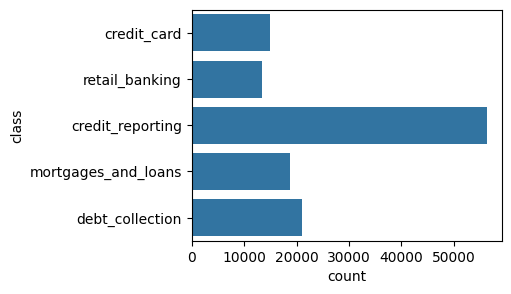

In [56]:
plt.figure(figsize=(4, 3))
sns.countplot(dataset['class'])
plt.show()

we will get a better understanding by plotting a pie chart

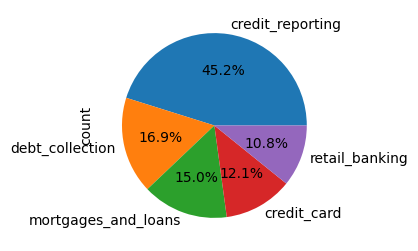

In [57]:
plt.figure(figsize=(3, 3))
dataset['class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**Solution:** 
Found on the internet that the possible solutions are:

- Over-sampling the minority class: This is done by adding more copies of the minority class.
- Under-sampling the majority class: This is done by removing some samples from the majority class.
- Synthetic data generation: This is done by generating synthetic samples from the minority class. eg. SMOTE
etc.

Let's explore the complaints column now

### Length of Complaints

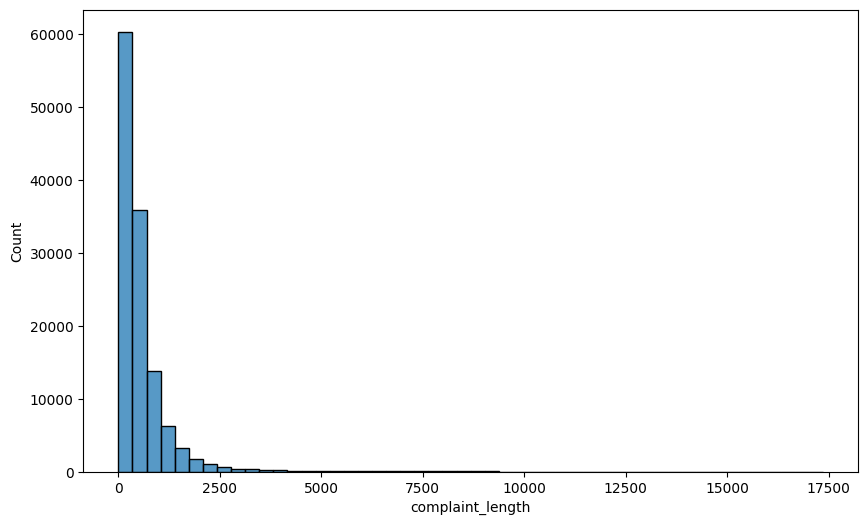

In [58]:
dataset['complaint_length'] = dataset['cleaned_complaint'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['complaint_length'], bins=50)
plt.show()

In [59]:
dataset['complaint_length'].describe()

count    124672.000000
mean        551.033287
std         713.235628
min           3.000000
25%         192.000000
50%         362.000000
75%         656.000000
max       17356.000000
Name: complaint_length, dtype: float64

from the above plot and description we see that:
    
        - the average length of complaints is around 551 words
        - the minimum length of a complaint is 3 words
        - the maximum length of a complaint is 17356 words

**conclusion**

we can see that the length of complaints is highly skewed. we will have to take care of this while building the model




how do the complaints with length 3 look like?

In [62]:
# how do the complaints with length 3 look like?
print(dataset[dataset['complaint_length'] == 3])

          id             class cleaned_complaint  complaint_length
16201  20088  credit_reporting               fdc                 3


### word distribution

lets see the distribution of words in the complaints

In [63]:
# word distribution

dataset['word_count'] = dataset['cleaned_complaint'].apply(lambda x: len(str(x).split()))

dataset['word_count'].describe()

count    124672.000000
mean         87.096934
std         110.849229
min           1.000000
25%          30.000000
50%          58.000000
75%         104.000000
max        2684.000000
Name: word_count, dtype: float64

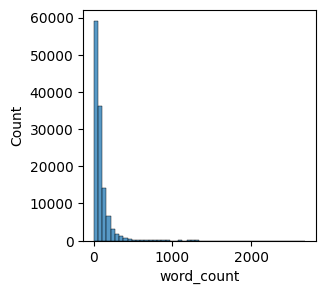

In [64]:
# plot the word count distribution
plt.figure(figsize=(3, 3))
sns.histplot(dataset['word_count'], bins=50)
plt.show()

From the above plot and description we see that:

    - the average number of words in a complaint is around 87
    - the minimum number of words in a complaint is 1
    - the maximum number of words in a complaint is 2684

**conclusion**

we can see that the number of words in complaints is highly skewed. we will have to take care of this while building the model

In [65]:
dataset.head()

,id,class,cleaned_complaint,complaint_length,word_count
0,0,credit_card,purchas order day ship amount receiv product w...,1471,230
1,1,credit_card,forward messag date tue subject pleas investig...,800,132
2,2,retail_banking,forward messag cc sent friday pdt subject fina...,1076,173
3,3,credit_reporting,payment histori miss credit report special loa...,790,131
4,4,credit_reporting,payment histori miss credit report made mistak...,752,123


In [66]:
word_list = []

for i in dataset['cleaned_complaint']:
    for j in i.split():
        word_list.append(j)

In [67]:
word_list[:10]

['purchas',
 'order',
 'day',
 'ship',
 'amount',
 'receiv',
 'product',
 'week',
 'sent',
 'followup']

In [68]:
from collections import Counter

word_freq = Counter(word_list)

word_freq.most_common(10)

[('account', 255533),
 ('credit', 242534),
 ('report', 215983),
 ('inform', 120422),
 ('payment', 118364),
 ('call', 103704),
 ('receiv', 82877),
 ('time', 76342),
 ('would', 72343),
 ('loan', 70753)]

In [69]:
word_freq.most_common()[-10:]

[('iknow', 1),
 ('forkid', 1),
 ('sept', 1),
 ('wetink', 1),
 ('descriptionqtyal', 1),
 ('tbrough', 1),
 ('yousaidmynewsinglepointofcontact', 1),
 ('faithsinceallpaymentswerepaidinfullafterthemiscommunicationbyrepswerer', 1),
 ('immediu', 1),
 ('revmd', 1)]

**conclusion**

we can see that the most common words in the complaints are related to the financial domain. this is expected as the complaints are related to financial products


# lets group the complaints into classes and see the distribution of words



In [70]:
class_words = {}

for i in dataset['class'].unique():
    words = []
    for j in dataset[dataset['class'] == i]['cleaned_complaint']:
        for k in j.split():
            words.append(k)
    class_words[i] = Counter(words)

In [71]:
from wordcloud import WordCloud

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1. credit card

In [72]:
class_words['credit_card'].most_common(10)

[('card', 37789),
 ('credit', 33658),
 ('account', 28366),
 ('call', 19702),
 ('charg', 18422),
 ('payment', 17363),
 ('bank', 14445),
 ('receiv', 13869),
 ('would', 12966),
 ('time', 12869)]

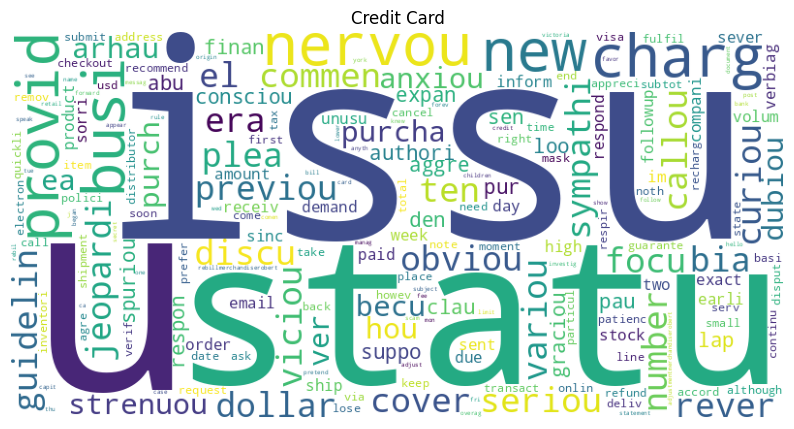

In [73]:
plot_word_cloud(' '.join(class_words['credit_card']), 'Credit Card')

### 2. credit reporting

In [74]:
class_words['credit_reporting'].most_common(10)

[('report', 164452),
 ('credit', 151456),
 ('account', 129860),
 ('inform', 74750),
 ('disput', 42203),
 ('remov', 39224),
 ('payment', 37369),
 ('file', 27629),
 ('date', 27215),
 ('inquiri', 27084)]

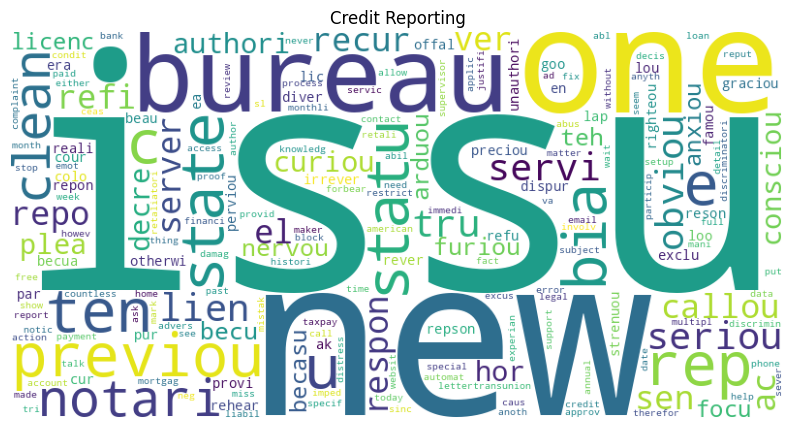

In [75]:
plot_word_cloud(' '.join(class_words['credit_reporting']), 'Credit Reporting')

### 3. debt collection

In [77]:
class_words['debt_collection'].most_common(10)

[('debt', 39968),
 ('credit', 35965),
 ('account', 32076),
 ('report', 31265),
 ('collect', 26930),
 ('call', 21648),
 ('compani', 17747),
 ('inform', 17217),
 ('receiv', 15680),
 ('letter', 12041)]

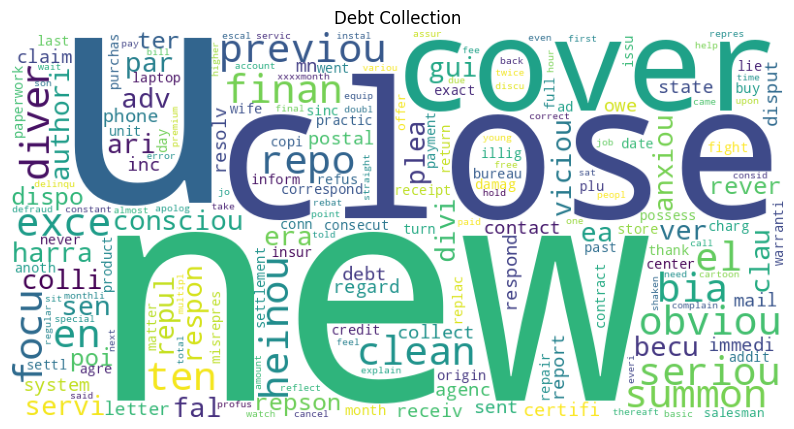

In [78]:
plot_word_cloud(' '.join(class_words['debt_collection']), 'Debt Collection')

### 4. mortgages and loans

In [79]:
class_words['mortgages_and_loans'].most_common(10)

[('payment', 47273),
 ('loan', 44144),
 ('call', 28109),
 ('mortgag', 26614),
 ('would', 22583),
 ('account', 19596),
 ('time', 19173),
 ('receiv', 18896),
 ('credit', 16215),
 ('told', 15635)]

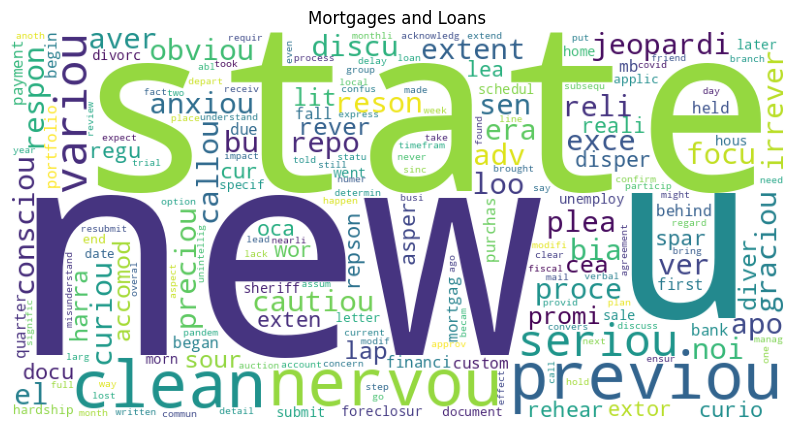

In [80]:
plot_word_cloud(' '.join(class_words['mortgages_and_loans']), 'Mortgages and Loans')

### 5. retail banking

In [81]:
class_words['retail_banking'].most_common(10)

[('account', 45635),
 ('bank', 27957),
 ('money', 15937),
 ('check', 15450),
 ('call', 15165),
 ('receiv', 11001),
 ('would', 10493),
 ('day', 9931),
 ('told', 9673),
 ('fund', 9509)]

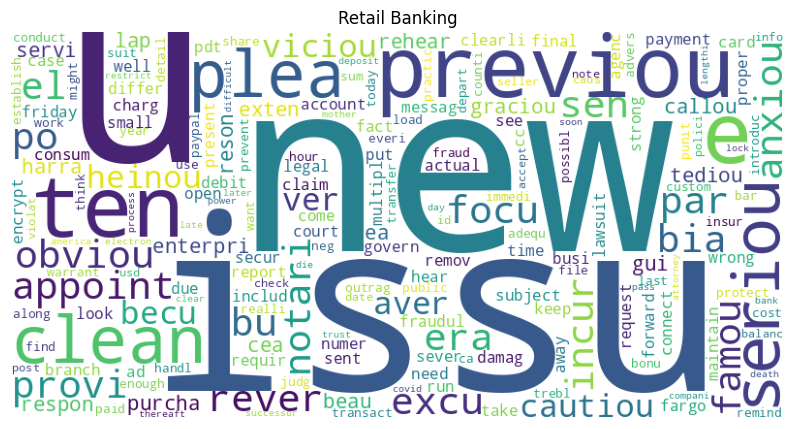

In [82]:
plot_word_cloud(' '.join(class_words['retail_banking']), 'Retail Banking')

**Conclusions from Word Distribution:**

- the most frequent words for each class are related to the respective financial domain and are unique to each class
- hence the words in the complaints can be used to classify the complaints into the respective classes
- this hints towards the bag of words approach for classification

### Now lets make models with the data we have

### Vectorizing the data to create a Bag of Words

- we will use TF-IDF vectorizer to convert the text data into a bag of words

what is a bag of words?

- A bag of words is a representation of text data that describes the occurrence of words within a document. It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.

what is TF-IDF?

- TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).
- It is calculated by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataset['cleaned_complaint'])
y = dataset['class']

### Handling Imbalanced Classes

**ways to handle imbalanced classes:**
- Over-sampling the minority class: This is done by adding more copies of the minority class.
- Under-sampling the majority class: This is done by removing some samples from the majority class.
- Synthetic data generation: This is done by generating synthetic samples from the minority class. eg. SMOTE
- Using class weights: This is done by giving higher weights to the minority class.

## We will use the SMOTE technique to handle the imbalanced classes

what is SMOTE?

- SMOTE stands for Synthetic Minority Over-sampling Technique. It is a technique used to generate synthetic samples from the minority class.

![SMOTE](https://varshasaini.in/wp-content/uploads/2022/07/smote.jpeg)

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

### Splitting the data into training and testing sets

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [86]:
from sklearn.metrics import accuracy_score

### Building the model

### We created different classification models and compared their performance this is what we got

### we've used accuracy as the metric to evaluate the models

    - Logistic Regression: 0.88
    - Decision Tree: 0.86
    - Naive Bayes: 0.84
    - KNN: 0.86
    - XGBoost: 0.90
    - Random Forest: 0.94 (best model)


In [87]:
""" # decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred)) """

# 0.8617988703776065

' # decision tree\n\nfrom sklearn.tree import DecisionTreeClassifier\ndt = DecisionTreeClassifier()\ndt.fit(X_train, y_train)\n\ny_pred = dt.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred)) '

In [88]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.843501891618266


In [89]:
""" 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))                                                                                                                               
"""                                                                                                                                                                                                            
# 0.86

' \nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(X_train, y_train)\n\ny_pred = knn.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred))                                                                                                                               \n'

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8843359798227385


In [91]:
"""
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))
"""

# 0.9043195623601293

'\nfrom xgboost import XGBClassifier\n\nxgb = XGBClassifier()\nxgb.fit(X_train, y_train)\n\ny_pred = xgb.predict(X_test)\n\nprint(accuracy_score(y_test, y_pred))\n'

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print(accuracy_score(y_test, y_pred))

0.9379407115326548


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

        credit_card       0.94      0.95      0.95     11193
   credit_reporting       0.91      0.89      0.90     11310
    debt_collection       0.92      0.93      0.92     11214
mortgages_and_loans       0.95      0.95      0.95     11207
     retail_banking       0.97      0.97      0.97     11377

           accuracy                           0.94     56301
          macro avg       0.94      0.94      0.94     56301
       weighted avg       0.94      0.94      0.94     56301



In [94]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='weighted'))

0.9378645117452113


In [ ]:
import pickle

with open('random_forest_model_94f1.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

### We got the best accuracy with Random Forest Classifier

    - The accuracy of the Random Forest Classifier is 0.94
    - The f1-score of the Random Forest Classifier is 0.94

**Conclusion:**

    - We have successfully built a classification model that can categorize complaints into five classes with an accuracy of 94%
    - The model can help financial institutions resolve complaints more efficiently by routing them to the appropriate teams for quicker handling

### Let's take a look at the confusion matrix and the wrong predictions made by the model

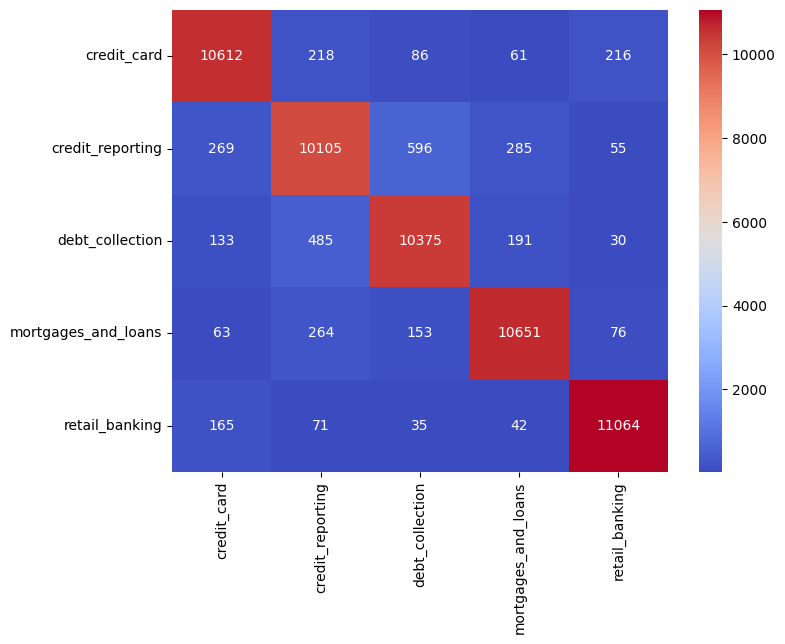

In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=rf.classes_, yticklabels=rf.classes_)

plt.show()


**Conclusion from the confusion matrix:**

    - The model has made some wrong predictions, especially between the classes 'credit reporting' and 'debt collection'
    - The model has performed well overall with an accuracy of 94%

### Let's try other methods of handling imbalanced data

### 1. Under-sampling the majority class

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)

In [12]:
X_train , X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8331477770355525


### 2. Over-sampling the minority class

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9684730288982434


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

        credit_card       0.97      0.99      0.98     11193
   credit_reporting       0.97      0.90      0.93     11310
    debt_collection       0.95      0.97      0.96     11214
mortgages_and_loans       0.96      0.98      0.97     11207
     retail_banking       0.99      1.00      0.99     11377

           accuracy                           0.97     56301
          macro avg       0.97      0.97      0.97     56301
       weighted avg       0.97      0.97      0.97     56301



#### Note!!!
I realized a veru big mistake I've done while using SMOTE, oversampling, undersampling etc. I've done it on the whole dataset. I should have done it only on the training data. I will correct this mistake and then run the models again

In [9]:
from imblearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8560256667335071

Classification Report:
                     precision    recall  f1-score   support

        credit_card       0.78      0.77      0.78      3024
   credit_reporting       0.90      0.91      0.90     11362
    debt_collection       0.81      0.79      0.80      4142
mortgages_and_loans       0.86      0.85      0.85      3722
     retail_banking       0.83      0.85      0.84      2685

           accuracy                           0.86     24935
          macro avg       0.84      0.83      0.84     24935
       weighted avg       0.86      0.86      0.86     24935



In [11]:
from imblearn.over_sampling import BorderlineSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('borderline_smote', BorderlineSMOTE(random_state=42, kind='borderline-1')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.855424102666934

Classification Report:
                     precision    recall  f1-score   support

        credit_card       0.78      0.77      0.78      3024
   credit_reporting       0.90      0.90      0.90     11362
    debt_collection       0.81      0.80      0.80      4142
mortgages_and_loans       0.85      0.85      0.85      3722
     retail_banking       0.83      0.85      0.84      2685

           accuracy                           0.86     24935
          macro avg       0.83      0.83      0.83     24935
       weighted avg       0.86      0.86      0.86     24935



### Let's take a look at misclassified complaints

In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
y_pred_series = pd.Series(y_pred, index=y_test.index)
feature_names = vectorizer.get_feature_names_out()

X_test_df = pd.DataFrame(X_test.toarray(), columns=feature_names, index=y_test.index)

results_df = X_test_df.copy()
results_df['true_label'] = y_test
results_df['predicted_label'] = y_pred_series
results_df['complaint'] = dataset.loc[y_test.index, 'cleaned_complaint']

misclassified = results_df[results_df['true_label'] != results_df['predicted_label']]

print("\nMisclassified Examples:")

misclassified[['complaint', 'true_label', 'predicted_label']].head()



Misclassified Examples:


,complaint,true_label,predicted_label
13290,due husband file bankruptci includ second mortgag bank tri avoid lose home time file chapter judg review case gross miscalcul xxxxmonth monthli payment would make bankruptci court boy differ payment along health insur premium high deduct sure would hard time pay bank full monthli payment reach bank explain famili hardship ask somehow could lower interest help u afford payment sent u could tri hard continu payment eventu ran payment coupon sent payment call request anoth book ask anyth could lower payment told sinc file bankruptci would receiv new payment book agent could speak also inform could afford full payment remit could bankruptci discharg due hardship bank sent correspond u discharg state immedi owe report credit bureau loan discharg spoke recoveri depart agre make monthli payment make work hard rebuild credit happi say success previou year put asid hous repair badli need recent approach bank possibl refin combin first mortgag amount due bank howev unabl get amount bank understand receiv phone messag bank need speak regard account knew quarterli call confirm monthli payment also attempt call coupl day could reach high call volum return messag spoke agent told balanc want report would continu monthli payment said need transfer recoveri depart spoke also explain need balanc sinc may refin told owe shock differ ask explain said addit amount due interest fee ask pleas provid breakdown show interest fee ad account initi told could give breakdown explain owe larger amount want make sure larg differ said would tri talk someon mayb could would take busi day receiv inform would call back spoke loan offic current work also unsur balanc due bank sinc report credit bureau receiv messag cell phone call bank spoke inform would continu make monthli payment also ask verifi balanc sinc given two differ amount told due said oh wait minut put hold came back line said ye due offer pay letter thank explain also need account account show date interest fee ad said could request account histori sent would specif show date charg ad account tri explain felt right know inform especi sinc differ two amount huge amount u written best knowledg,debt_collection,mortgages_and_loans
54413,recent obtain copi consum report notic unauthor inaccur item report well educ highli intellig well awar right consum fair credit report act requir credit report agenc report accur account inform within credit file account belong mean report inaccur inform within credit report mind request list account item remov immedi pursuant fcra section c block inform result ident theft requir block inform consum file result ident theft later four busi day date receipt agenc,debt_collection,credit_reporting
50353,phone atg credit llc advis return work due pull payment restart payment return work supervisor told repres would okay stop ach pull wait day pull fund anyway caus medic hardship money took medic premium must paid request pull fund check account yet refund moni pull error,debt_collection,mortgages_and_loans
21436,pandem hope your safe sound listen shock review credit report today found late payment,debt_collection,credit_reporting
115368,amount tri disput ask verif keep say,credit_reporting,debt_collection


we can see from the complaint number 54413 that it's actual label is **Debt collection** but the model predicted it as **Credit reporting**
However, from its narrative, it is clear that it is related to credit reporting. 

This hints towards the fact that the dataset may have some mislabeled complaints.

### Misclassified Statistics

In [20]:
print(f"Total number of test samples: {len(y_test)}")
print(f"Number of misclassified samples: {len(misclassified)}")
print(f"Misclassification rate: {len(misclassified) / len(y_test):.2%}")

Total number of test samples: 24935
Number of misclassified samples: 3590
Misclassification rate: 14.40%
